# Linear Regression Implementation
We can find normal equation and 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


## Generating random data

In [2]:
X = np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

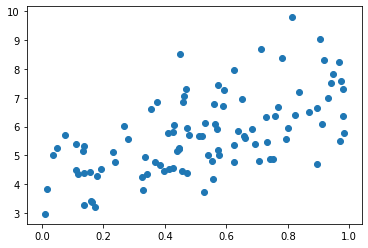

In [3]:
plt.scatter(X, Y)
#plt.axis([0, 2, 0, 10])
plt.show()

## The Normal Equation

In [27]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
theta_best

array([[4.09748962],
       [3.09609234]])

### Predict new values

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [7]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04251273],
       [9.98722859]])

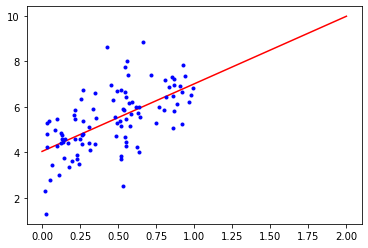

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, Y, "b.")
plt.show()

## Using the LinearLegression from sklearn

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.04251273]), array([[2.97235793]]))

In [11]:
lin_reg.predict(X_new)

array([[4.04251273],
       [9.98722859]])

LinearRegression from sklearn is using the Normal Equation to find the best function representing the data (training).

## Using least squares
This function computes θ = X+y, where X+ is the pseudoinverse of X (specifically the **Moore-Penrose inverse**)

The **pseudoinverse** itself is computed using a standard matrix factorization technique called **Singular Value Decomposition (SVD)** that can decompose the training set matrix X into the matrix multiplication of three matrices 

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, Y, rcond=1e-6)

In [22]:
theta_best_svd, np.linalg.pinv(X_b).dot(Y)

(array([[4.04251273],
        [2.97235793]]), array([[4.04251273],
        [2.97235793]]))